# A $1 Million Dollar Question You Can Solve With Data Science Today!

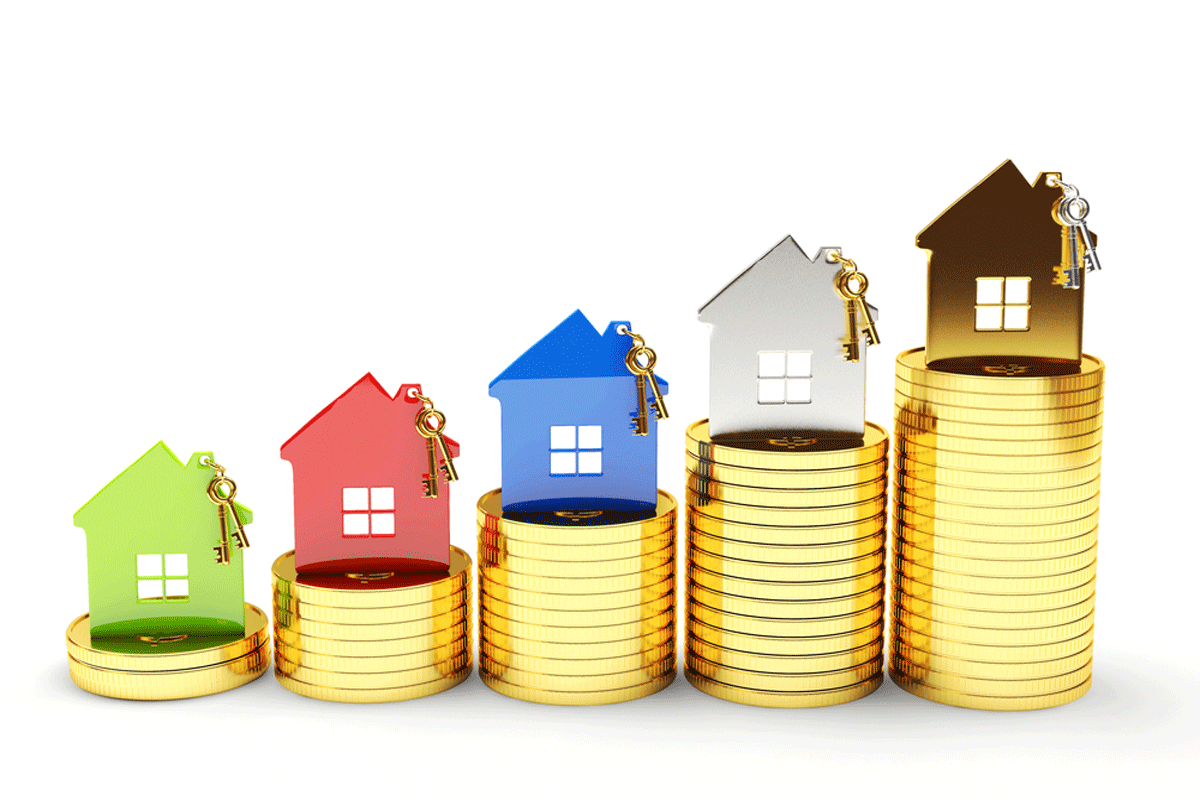

In [1]:
from IPython import display 
display.Image("https://www.onthemarket.com/content/wp-content/uploads/2016/01/2016-House-prices-lead.gif", width=600)

This is a Python Jupyter Notebook to demostrate an end-to-end process for a specific Data-Science problem on a specific dataset.

Before anything, let's import a bunch of pythoin libraries that we are going to use later in this notebook. You can always import more libraries here as needed!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 🟥 Phase A: What Happened and Why? (EDA)
In this first phase your main goal is loading up the data into a Pandas dataframe and looking into it to understand your data, clean your data, and finally explore your data by performing some simple statistical analysis to discover patterns and ways to go in the next phase!

## 1️⃣ Step 1: Collecting Data
In this step we load the data into a panda data frame. Depending on the format of source data there are many ways to import data into a pandas dataframe. `read_csv` is one of the most popular ones to load data from flat files in csv format.

let's use `read_csv` function from pandas library (we renamed `Pandas` as `pd` for simplicity above, remember!) to load our source data file into a data-frame that we choose to call it `df`


In [3]:
pwd

'C:\\Users\\ssama'

In [4]:
cd downloads

C:\Users\ssama\downloads


In [5]:
# comment: loading data into a dataframe
df = pd.read_csv('./housing_prices_assignment.csv')

## 2️⃣ Step 2: Undestanding Data
In this step our objective is have an understanding of our data by looking at the generic characteristics of this dataframe such as: `number of rows`, `number of columns`, `list of column names`, `type of data values in each column`, `the distribution of values in the columns`, etc.

In [6]:
# let's take a look at the header of our new built dataframe
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
# dataframe dimensions: number of rows & number of columns
df.shape

(1460, 81)

In [8]:
# list of column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# data types of the values in the columns. For example the data type of the vale stores in the first row of the "price" and "Address" columns
type(df['MSZoning'][0]), type(df['SalePrice'][0]), type(df['Electrical'][0])

(str, numpy.int64, str)

In [12]:
# well, fortunatelly `pandas` has some functions that provide an overview of the dataframe. Let's use a couple of them to understand the data better!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
#here is another useful panda function to understand data:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

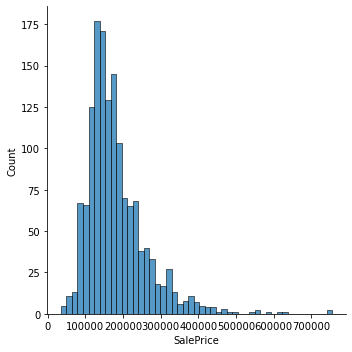

In [14]:
# if you are interested to go a bit deeper and understand more details about value distribution in each column, an easy way is 
# using visualization functions in the library `seaborn` (we called it `sns` above). Below is just one example, seaborn can do much more!
sns.displot(df['SalePrice'])

## 3️⃣ Step 3: Cleaning Data
Cleaning data is based on our understanding of data in the previous step. It could be multiple issues in data that needs to be cleaned such as `missing values`, `bad data`, `outliers`, etc. But here we keep it simple and focuse on one: `missing values`.

As you may have noticed from the outcome of our experiments in the previous step, there are some missing values in the data. 

In fact, the value of columns `Avg. Area Number of Rooms` is missing in 250 cases! We can address this issue multiple ways, depending on the situation. Below is two of the most popular approaches: (1) removing the rows with missing data and not worrying about them! , (2) replacing the missing values with the mean value of the existing values and hope for the best!

In [15]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [16]:
df.isnull().sum().sum()

6965

In [17]:
# approach #1: removing all rows with missing values
df_cleaned1 = df.dropna()

In [18]:
# let's take another look into our data AFTER cleaning
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             0 non-null      int64  
 1   MSSubClass     0 non-null      int64  
 2   MSZoning       0 non-null      object 
 3   LotFrontage    0 non-null      float64
 4   LotArea        0 non-null      int64  
 5   Street         0 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       0 non-null      object 
 8   LandContour    0 non-null      object 
 9   Utilities      0 non-null      object 
 10  LotConfig      0 non-null      object 
 11  LandSlope      0 non-null      object 
 12  Neighborhood   0 non-null      object 
 13  Condition1     0 non-null      object 
 14  Condition2     0 non-null      object 
 15  BldgType       0 non-null      object 
 16  HouseStyle     0 non-null      object 
 17  OverallQual    0 non-null      int64  
 18  OverallCond    0 non-n

In [19]:
# approach #2: replacing the missing values with the mean value of the existing values
meanValue = np.mean(df['LotFrontage']) # computing the meanValue
df_cleaned2 = df

df_cleaned2['LotFrontage'] = df_cleaned2['LotFrontage'].fillna(meanValue) # replacing NULLs witm the computed meanValue

In [20]:
# let's take another look into our data AFTER cleaning
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
# approach #2: replacing the missing values with the mean value of the existing values
meanValue = np.mean(df['GarageYrBlt']) # computing the meanValue
df_cleaned2 = df

df_cleaned2['GarageYrBlt'] = df_cleaned2['GarageYrBlt'].fillna(meanValue) # replacing NULLs witm the computed meanValue

In [22]:
# let's take another look into our data AFTER cleaning
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 4️⃣ Step 4: Statistical Analysis
We had to do all the previous steps in this phase to be able to do this step and addressing the question of this phase: What Happened? Why?

This can be like opening a can of worms though! 🥫🐛🐛🐛 There are countless experiments you can do as needed here. It all goes back to the questions you ask!

Below is only a few questions/examples of the most popular statistical analysis that can be done. But keep in mind that you have no limit to do more! We are fortunate enough to live in a time that a lot of statistical analysis functions has been built in to the python libraries like pandas and seaborn and all you need to do is learn how to use them! Piece's cake! 🍰

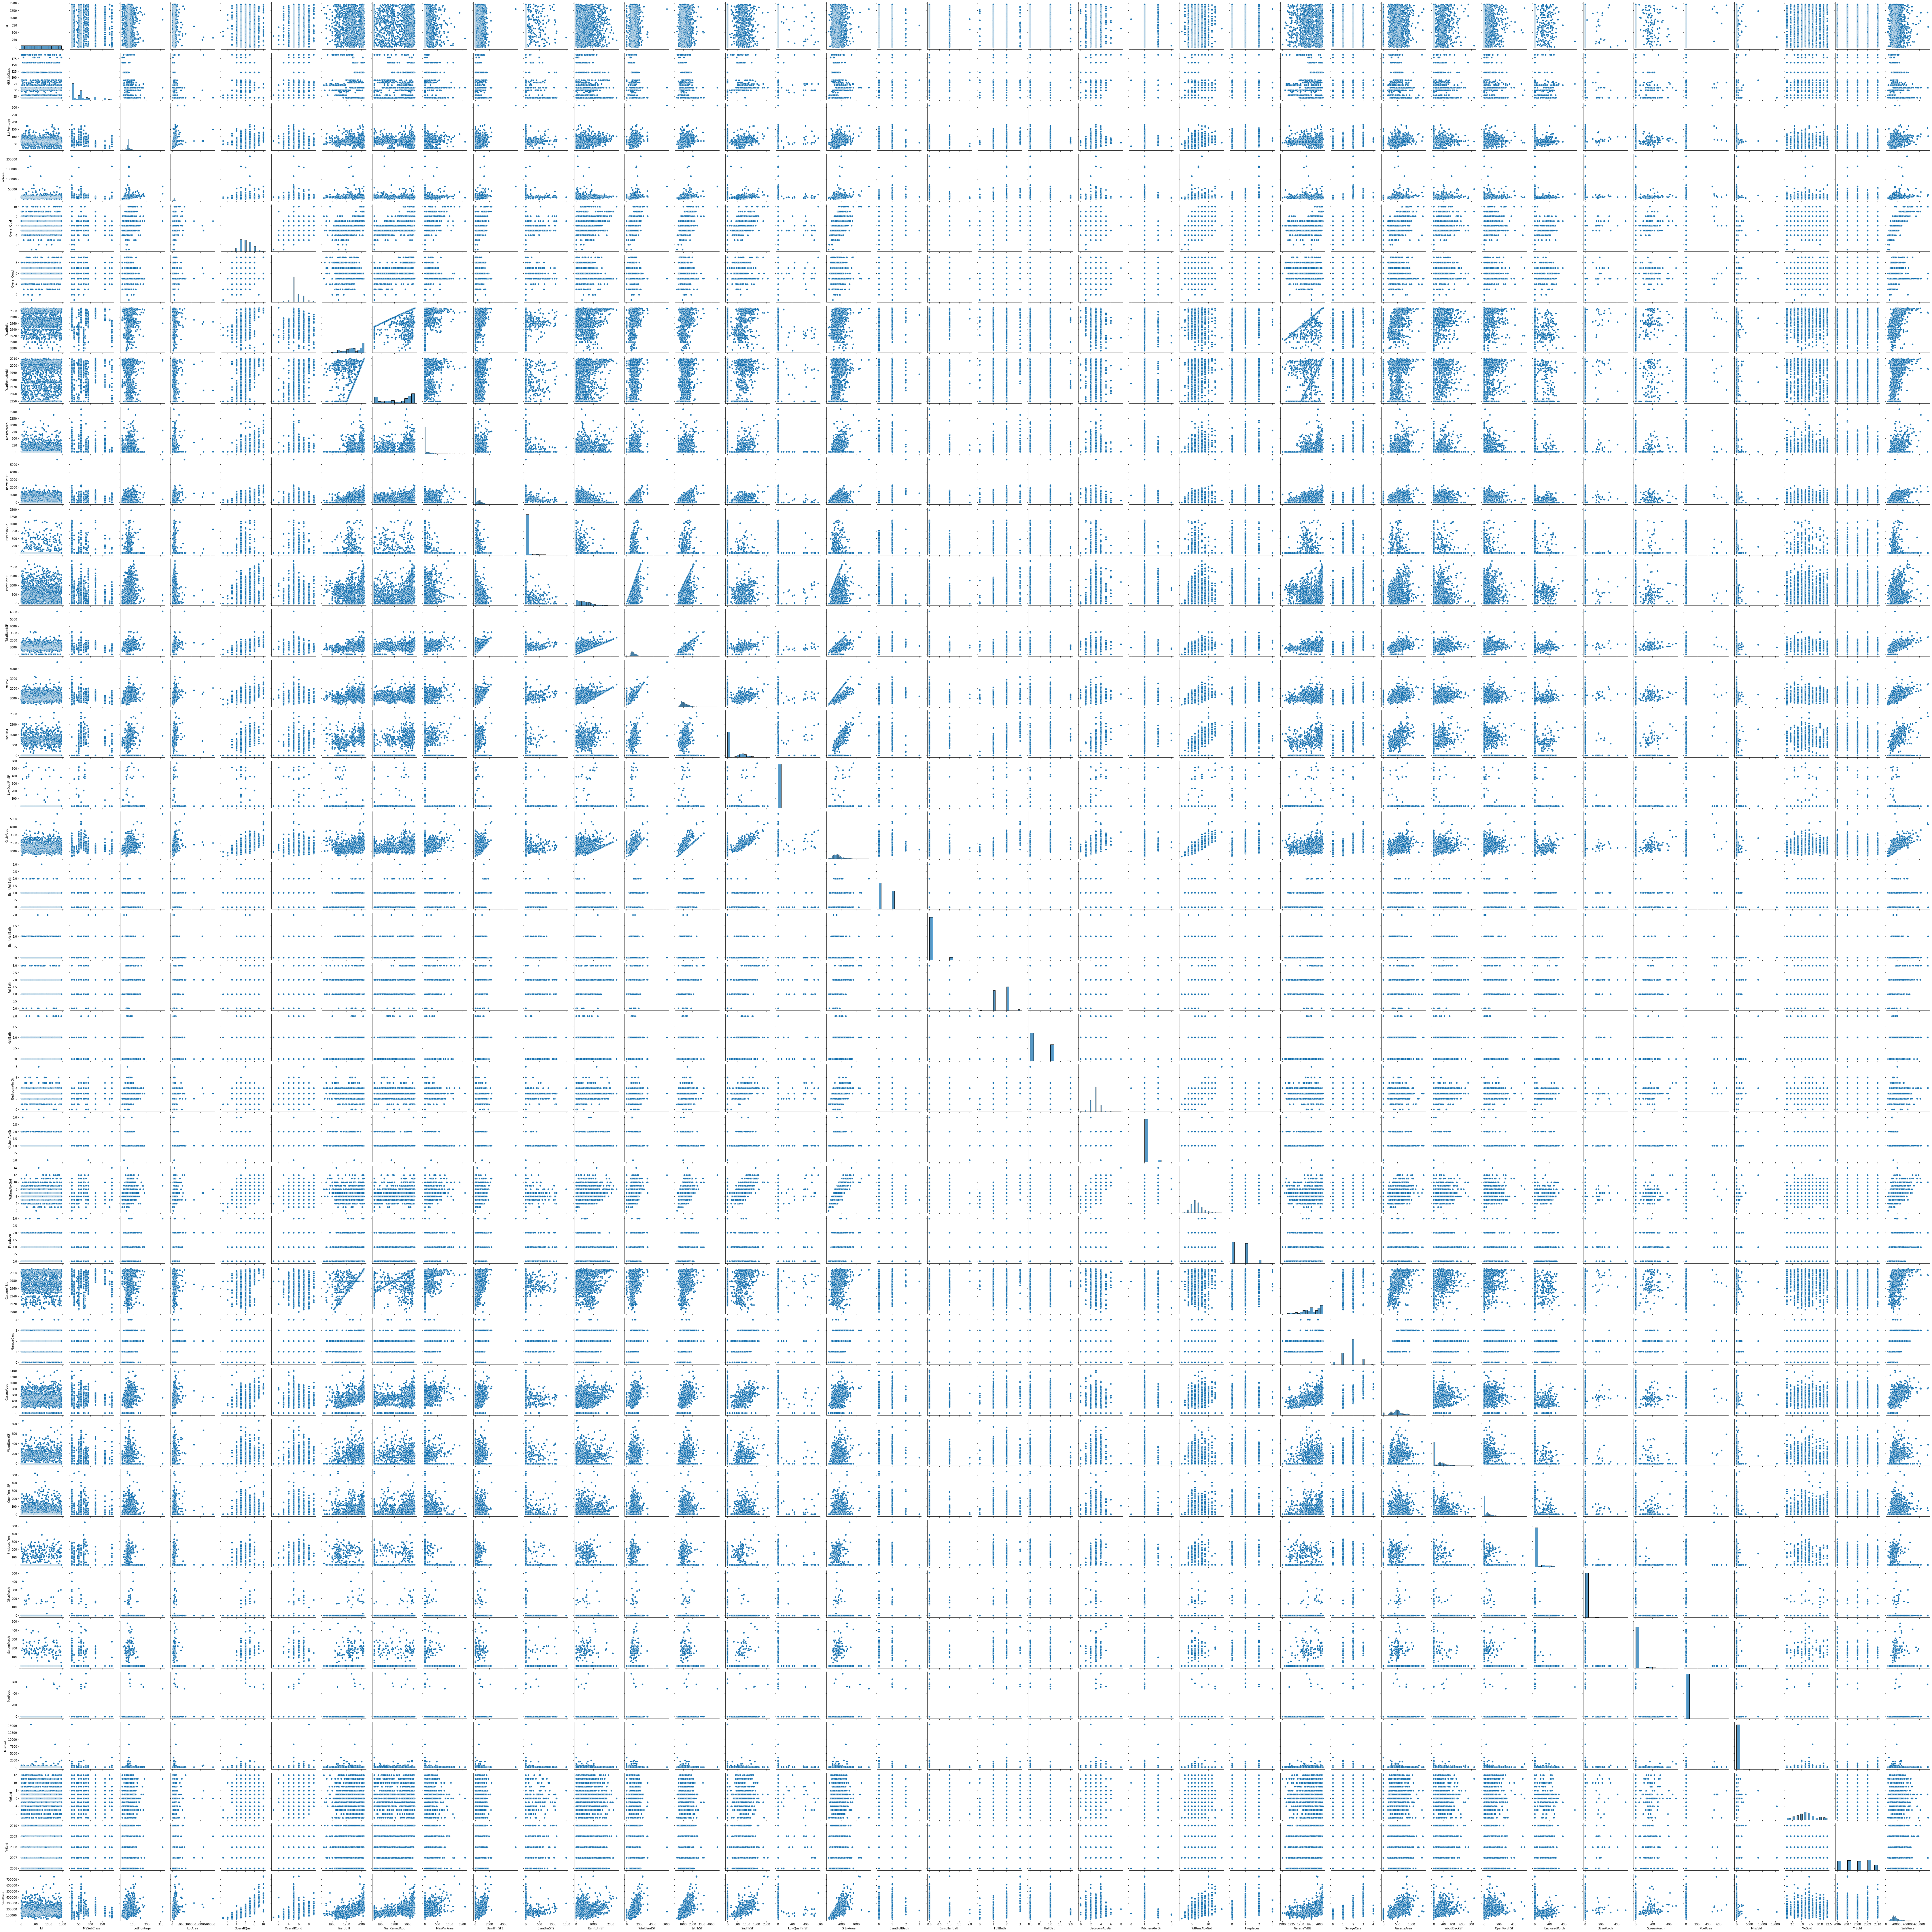

In [23]:
# Question: How is the correlation between each pairs of columns?
sns.pairplot(df_cleaned2)

In [25]:
# Question: What is the average values in a column? What about minimum and maximum?
display( 
    df_cleaned2['SalePrice'].mean(), 
    df_cleaned2['SalePrice'].min(), 
    df_cleaned2['SalePrice'].max())

180921.19589041095

34900

755000

In [28]:
# Question: How many of records have priced equal or greater than half Million Dollars?
df_cleaned2['is_1/2mplus'] = (df_cleaned2['SalePrice'] >= 500000) # creating a new column to store that information for each row to be used later
df_cleaned2['is_1/2mplus'].value_counts() #count by values

False    1451
True        9
Name: is_1/2mplus, dtype: int64

In [29]:
# Question: What is the average values of features when we group by the price-class (above-halfM, and below-halfM)
df_cleaned2.groupby(['is_1/2mplus']).mean()

Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
is_1/2mplus                                                                   
False        730.079256   56.960717    69.871771  10442.747760     6.079256   
True         798.333333   46.666667    98.777778  22460.222222     9.333333   

             OverallCond    YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1  \
is_1/2mplus                                                                    
False           5.578222  1971.071675   1984.749828  100.526681   437.809097   
True            5.111111  2002.888889   2003.555556  610.111111  1383.666667   

             ...  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
is_1/2mplus  ...                                                       
False        ...    46.455548      22.090283   3.430737    14.760165   
True         ...    79.666667       0.000000   0.000000    63.555556   

              PoolArea    MiscVal    MoSold       YrSold      SalePrice  \
is_1/2mplus                                                               
False         2.393522  43.758787  6.331496  2007.813921  178272.872502   
True         61.666667   0.000000  4.777778  2008.111111  607889.777778   

             is_1mplus  
is_1/2mplus             
False            False  
True             False  

[2 rows x 39 columns]

In [32]:
# Question: How many of records have "Number of Bedrooms above ground" equal or greater than 3?
df_cleaned2['is_3bdplus'] = (df_cleaned2['BedroomAbvGr'] >= 3) # creating a new column to store that information for each row to be used later
df_cleaned2['is_3bdplus'].value_counts() #count by values

True     1046
False     414
Name: is_3bdplus, dtype: int64

In [33]:
# Question: How many of the houses priced above half Million Dollars have 3 or more bedrooms?
pd.crosstab(df_cleaned2['is_3bdplus'], df_cleaned2['is_1/2mplus'])

is_1/2mplus  False  True 
is_3bdplus               
False          411      3
True          1040      6

# 🟥🟥 Phase B: What Will Happen? (AI Models)
The objective in this phase is using Machinea Learning algorithms (through python libraries) to build a predictive model that can get a few inout features such as the number of bedrooms, the number of rooms, income level within the area and tell us if this given house is likly to be priced equal or greater than $1M dollars!

## 5️⃣ Step 5: Predictive Modeling

In [1]:
# let's take a look at all available columns
df_cleaned2.columns

NameError: name 'df_cleaned2' is not defined

In [ ]:
# marking input "features" as X and the "target label" as y
feature_names = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms']
X = df_cleaned2[feature_names]
y = df_cleaned2['is_1mplus']

In [ ]:
#import the required library
from sklearn.model_selection import train_test_split

# splitting entire data randomly into test (30%) and trainig (70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#import the required library
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() #define model

model.fit(X_train, y_train) #fit the model to the data (AKA TRAINING)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(X_train, y_train))) #accuracy on training data
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test))) #accuracy on test data

In [ ]:
# define a new input case with all of the requred features
# for simplicity we pick one row from existing data, 
# but it doesn't need to be from existing data! Pass any values, the model will make a prediction!
# required features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']

newInputs = list(df_cleaned2.loc[90,feature_names]) 

Xnew = [newInputs]

# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

In [ ]:
# exercise: insert new values of input features and see what's the model's prediction for yourselves!
newInputs = [100000, 10, 10] 

Xnew = [newInputs]

# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted =%s" % (Xnew[0], ynew[0]))

In [ ]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)
y_pred.value_counts()

In [ ]:
y_test = y_test.reset_index(drop=True)
y_test.value_counts()

# 🟥🟥🟥 Phase C: Are You Sure? (Model Evaluation)
The objective of this phase is evaluating the model and make sure it works! There are various ways and metrics to evaluate and quantify the performance of a model. 

Here in this `Classification` example we focus on a couple of most important metrics: (1) Confusion Metrix and (2) ROC Curve

In other types of problems such as `Regression` and `Unsupervised Learning` there are other metrics that one can use for model evaluation. You will learn more about them in the assignment.

## 6️⃣ Step 6: Evaluation
In `Classifican` type of problems when our goal is to make a class prediction. In many cases that is a binary classification, meaning there are only 2 classes available such as Yes/No,  1/0, True/False, or Positive/Negative etc. Let say two classes of Posive and Negative for simplicity. 

`Confusion Matrix` is a good simeple way to evaluate the performance of the model on unseen data. Confusion-Matrix includes 4 components consist of the count of the following variables:

- **False-Positives**: those which the model predicted as Positive, but they are actually not Positive **(Falsly predicted as Positive)**

- **True-Positives**: those which the model predicted as Positive, and they are actually Positive **(Truly predicted as Positive)**

- **False-Negative**: those which the model predicted as Negative, but they are actually not Negative **(Falsly predicted as Negative)**

- **True-Negative**: those which the model predicted as Negative, and they are actually Negative **(Truly predicted as Negative)**

The `ROC curves` are also made of these 4 above fundamental components. However, unlike in Confusion-Matrix the threshold value of classification is a `moving threshold`. The area under the curve or `AUC` is a good indicator for performance of a classification model. An ideal model (not exist!) would have a AUC value of 1.00. Any model with a AUC of 0.50 or lower is not better than a void classifier purely based on flipping a coin! 

In [ ]:
#confusion metrics homemade
pd.crosstab(y_pred, y_test)

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap = 'Blues')  
plt.show()  

In [ ]:
import matplotlib.pyplot as plt  
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)  
plt.show()

## 7️⃣ Step 7: Deployment
We will talk about  this important part in Week 5!!!